In [13]:
import sys
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft
from matplotlib.animation import FuncAnimation

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))
h5_files = glob.glob(os.path.join("..\\output", "*.h5"))

with h5py.File(h5_files[0], 'r') as data:
    # Read datasets
    eta_hat = data["eta_hat"][:]
    phi_hat = data["phi_hat"][:]
    Hs = data["Hs"][:]
    Tp = data["Tp"][:]
    time = data["time"][:]

    # Read attributes
    modes = data.attrs["modes"]
    length = data.attrs["length"]
    Ta = data.attrs["Ta"]

# Create a new compressed file
with h5py.File('your_compressed_file.h5', 'w') as f:
    # Save datasets with maximum compression
    f.create_dataset("eta_hat", data=eta_hat, compression="gzip", compression_opts=9)
    f.create_dataset("phi_hat", data=phi_hat, compression="gzip", compression_opts=9)
    f.create_dataset("Hs", data=Hs, compression="gzip", compression_opts=9)
    f.create_dataset("Tp", data=Tp, compression="gzip", compression_opts=9)
    f.create_dataset("time", data=time, compression="gzip", compression_opts=9)

    # Save attributes
    f.attrs["modes"] = modes
    f.attrs["length"] = length
    f.attrs["Ta"] = Ta

IndexError: list index out of range

In [7]:
import sys
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft2, irfft2
from matplotlib.animation import FuncAnimation

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))
h5_files = glob.glob(os.path.join("..\\..\\output", "*.h5"))

with h5py.File(h5_files[0], 'r') as data:
    # Read datasets
    y = data["y"][:]
    Hs = data.attrs["Hs"]
    Tp = data.attrs["Tp"]

    # Read attributes
    modes = data.attrs["modes"]
    length = data.attrs["length"]
    Ta = data.attrs["Ta"]

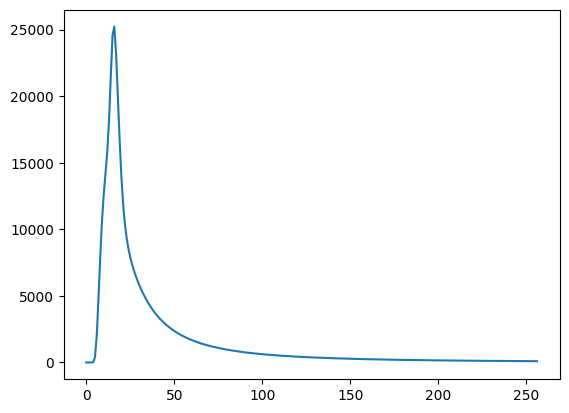

In [11]:
plt.plot(np.abs(y[0, 0, 0, :]))

In [ ]:
Hs = 4.5
Tp = 10.0
gamma = 4.0
g = 9.81
beta = 0.1
length = 3000
modes = 512
mHOS = 512

k0 = 2 * np.pi / length
T1 = 0.834 * Tp

kx = np.linspace(-modes, modes-1, 2*modes, dtype=np.float32) * k0
KX, KY = np.meshgrid(kx, kx)
theta = np.atan2(KY, np.abs(KX))
K = np.sqrt(KX**2 + KY**2)
K[modes, modes] = 1
W = np.sqrt(K * g)

sigma = 0.07 * (W <= 5.24/T1) + 0.09 * (W > 5.24/T1)
SW = (155 * Hs**2 / T1**4 / W**5 *
    np.exp(-944 / (T1*W)**4) *
    gamma ** np.exp(-((0.191*W*T1 - 1)/(np.sqrt(2)*sigma))**2))
SK = SW * g / (2 * np.sqrt(K * g))

GT = 1 / beta * np.cos(2 * np.pi * (theta) / (4 * beta))**2
GT[(theta < -beta) | (theta > beta)] = 0

spec = SK * GT / K
spec[modes, modes] = 0

spec = spec / np.trapezoid(np.trapezoid(spec, kx, axis=0), kx) * 2 * Hs**2 / 16

phases = np.zeros((2*modes, 2*modes), dtype=np.complex64)
phases[:modes+1, :modes+1] = np.exp(1.j*2*np.pi*np.random.rand(modes+1, modes+1))
phases[1:modes, modes+1:] = np.exp(1.j*2*np.pi*np.random.rand(modes-1, modes-1))
phases[modes+1:, 1:modes] = np.conj(phases[1:modes, modes+1:][::-1, ::-1])
phases[0, 0] = 1
phases[modes, 0] = 1
phases[0, modes] = 1
phases[modes, modes] = 1
phases[modes:, modes:] = np.conj(phases[1:modes+1, 1:modes+1][::-1, ::-1])
phases[modes+1:, 0] = np.conj(phases[1:modes, 0][::-1])
phases[0, modes+1:] = np.conj(phases[0, 1:modes][::-1])

SIGN = np.fft.fftshift(np.sign(KX))
eta_hat = np.sqrt(np.fft.fftshift(spec)*k0*k0*0.5) * phases * 2 * modes * 2 * modes
phi_hat = eta_hat * np.exp(-1.j * SIGN * np.pi / 2) * np.sqrt(g / np.fft.fftshift(K))

index = (np.linspace(-modes, modes-1, 2*modes) < modes * 2 / (mHOS + 1)) & (np.linspace(-modes, modes-1, 2*modes) > -modes * 2 / (mHOS + 1))
eta_hat[index, index] = 0
phi_hat[index, index] = 0

3
